In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/basedado/ca-2004-01.csv


********

In [2]:
import pandas as pd

# **VENDO OS PREÇOS DE COMBUSTÍVEIS AUTOMOTIVOS**

In [3]:
data = pd.read_csv('/kaggle/input/basedado/ca-2004-01.csv', sep=';')

In [4]:
data.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,11/05/2004,"1,967","1,6623",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,11/05/2004,"0,899","0,6282",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL,11/05/2004,"1,299","1,1704",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,10/05/2004,"1,85","1,67",R$ / litro,BRANCA
4,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,10/05/2004,"0,78","0,48",R$ / litro,BRANCA


Qual o mais caro? E o mais barato

In [5]:
# Ver o maior valor de venda
valor_maximo = data['Valor de Venda'].max()

# Ver o menor valor de venda
valor_minimo = data['Valor de Venda'].min()

# Exibir os resultados
print(f"O valor de venda mais caro é: {valor_maximo}")
print(f"O valor de venda mais barato é: {valor_minimo}")


O valor de venda mais caro é: 2,89
O valor de venda mais barato é: 0,59


Testando botõezinhos

In [ ]:
# Perguntar o nome do produto
produto = input("Digite o nome do produto: ")

# Filtrar o dataset pelo produto fornecido
produtos_filtrados = data[data['Produto'] == produto]

# Verificar se o produto foi encontrado
if not produtos_filtrados.empty:
    # Converter a coluna 'Valor de Compra' para numérico, ignorando erros
    produtos_filtrados['Valor de Compra'] = pd.to_numeric(produtos_filtrados['Valor de Compra'], errors='coerce')

    # Encontrar o valor de compra mais barato, ignorando valores inválidos
    valor_minimo_compra = produtos_filtrados['Valor de Compra'].min()

    # Listar todos os municípios
    lista_municipios = produtos_filtrados['Municipio'].unique()

    # Exibir os resultados
    print(f"O valor de compra mais barato para o produto '{produto}' é: {valor_minimo_compra}")
    print(f"Lista de municípios onde o produto foi vendido: {', '.join(lista_municipios)}")
else:
    print(f"O produto '{produto}' não foi encontrado no dataset.")


*gráfico*

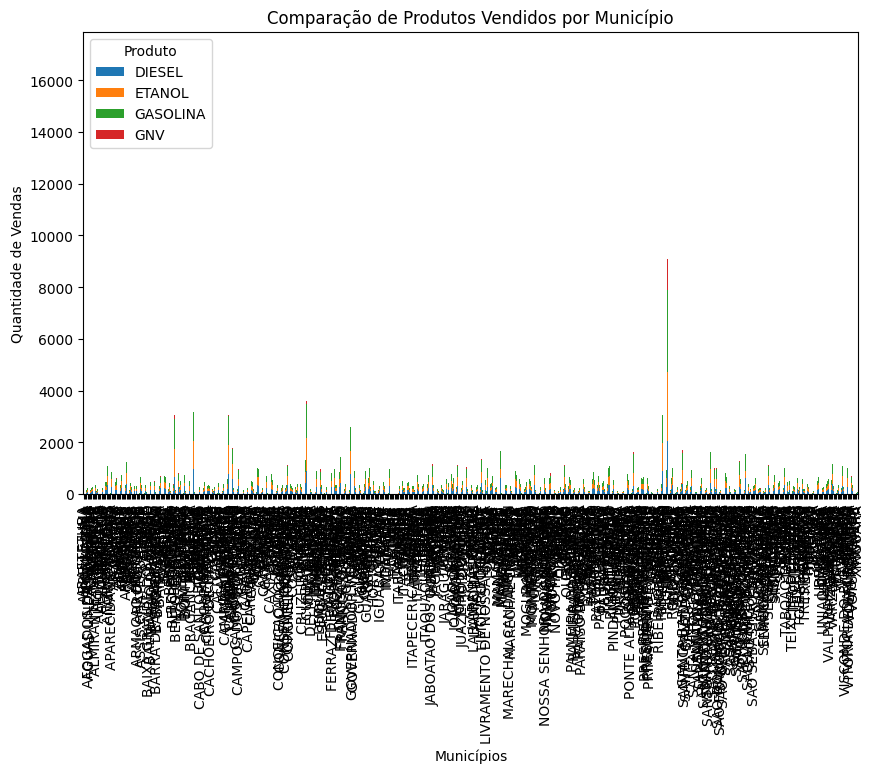

In [9]:
import matplotlib.pyplot as plt

# Agrupar por 'Municipio' e 'Produto' para contar o número de vendas de cada produto em cada município
produto_vendas = data.groupby(['Municipio', 'Produto']).size().unstack().fillna(0)

# Criar o gráfico de barras empilhadas para comparar os municípios e os produtos mais vendidos
produto_vendas.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title('Comparação de Produtos Vendidos por Município')
plt.xlabel('Municípios')
plt.ylabel('Quantidade de Vendas')

# Mostrar o gráfico
plt.show()


In [ ]:
##ficou mto bagunçado pq coloquei por municipio, não por estado

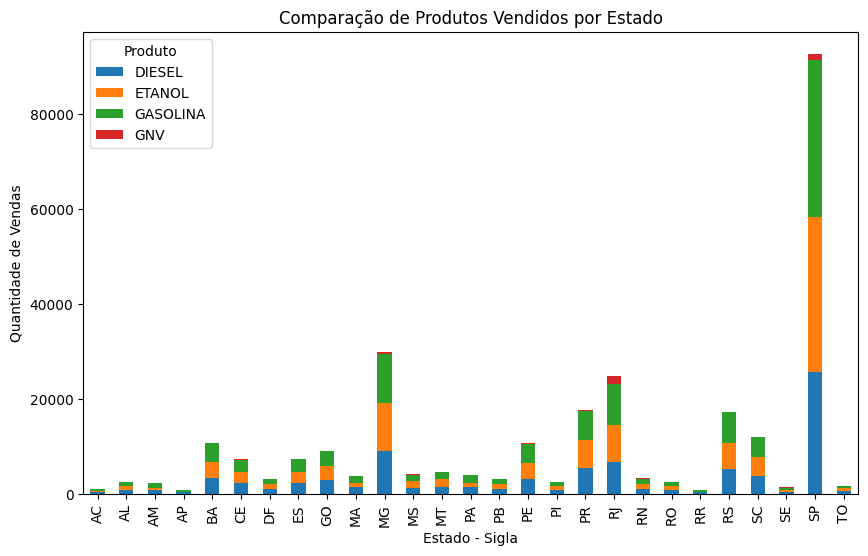

In [8]:
import matplotlib.pyplot as plt

# Agrupar por 'Estado' e 'Produto' para contar o número de vendas de cada produto em cada estado
produto_vendas_estado = data.groupby(['Estado - Sigla', 'Produto']).size().unstack().fillna(0)

# Criar o gráfico de barras empilhadas para comparar os estados e os produtos mais vendidos
produto_vendas_estado.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title('Comparação de Produtos Vendidos por Estado')
plt.xlabel('Estado - Sigla')
plt.ylabel('Quantidade de Vendas')

# Mostrar o gráfico
plt.show()
